# US Census Bureau Data Clean

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os
import re 


pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

Specify your file path

In [2]:
path = '/Users/tj/trevorj@berkeley.edu - Google Drive/My Drive/Classes/W210_capstone/W210 Capstone/Data/population/ACS/raw_census_bureau'
os.chdir(path)
# data_files = [i for i in os.listdir(path) if re.search('Data.csv', i)]
data_files = [f'ACSST5Y{i}.S0101-Data.csv' for i in range(2011, 2021)]
data_files

['ACSST5Y2011.S0101-Data.csv',
 'ACSST5Y2012.S0101-Data.csv',
 'ACSST5Y2013.S0101-Data.csv',
 'ACSST5Y2014.S0101-Data.csv',
 'ACSST5Y2015.S0101-Data.csv',
 'ACSST5Y2016.S0101-Data.csv',
 'ACSST5Y2017.S0101-Data.csv',
 'ACSST5Y2018.S0101-Data.csv',
 'ACSST5Y2019.S0101-Data.csv',
 'ACSST5Y2020.S0101-Data.csv']

### Function to clean census data
- Starting 2017, there are many more fields and exising fields change names.
- 2017 and beyond, there is actually a <18 age count field, but because the older tables dont have this, I'm leaving it out. 

In [3]:
def read_and_clean(csv_file):
  df = pd.read_csv(csv_file)
  
  # remove first row which contains field names
  df = df.iloc[1:]

  # add data year in cleaner format
  df['year'] = int(csv_file[7:11])

  # give fields intuitive names
  # starting 2017, the field names change a little
  if int(csv_file[7:11]) <= 2016:
    df = df.rename(columns = {
      'NAME': 'zip'
      ,'S0101_C01_001E': 'total_population'
      ,'S0101_C02_001E': 'total_population_male'
      ,'S0101_C03_001E': 'total_population_female'

      ,'S0101_C01_002E': 'population_0_4'
      ,'S0101_C02_002E': 'population_0_4_male'
      ,'S0101_C03_002E': 'population_0_4_female'

      ,'S0101_C01_003E': 'population_5_9'
      ,'S0101_C02_003E': 'population_5_9_male'
      ,'S0101_C03_003E': 'population_5_9_female'

      ,'S0101_C01_004E': 'population_10_14'
      ,'S0101_C02_004E': 'population_10_14_male'
      ,'S0101_C03_004E': 'population_10_14_female'

      ,'S0101_C01_005E': 'population_15_19'
      ,'S0101_C02_005E': 'population_15_19_male'
      ,'S0101_C03_005E': 'population_15_19_female'
      })
  else:
    df = df.rename(columns = {
      'NAME': 'zip'
      ,'S0101_C01_001E': 'total_population'
      ,'S0101_C03_001E': 'total_population_male'
      ,'S0101_C05_001E': 'total_population_female'

      ,'S0101_C01_002E': 'population_0_4'
      ,'S0101_C03_002E': 'population_0_4_male'
      ,'S0101_C05_002E': 'population_0_4_female'

      ,'S0101_C01_003E': 'population_5_9'
      ,'S0101_C03_003E': 'population_5_9_male'
      ,'S0101_C05_003E': 'population_5_9_female'

      ,'S0101_C01_004E': 'population_10_14'
      ,'S0101_C03_004E': 'population_10_14_male'
      ,'S0101_C05_004E': 'population_10_14_female'

      ,'S0101_C01_005E': 'population_15_19'
      ,'S0101_C03_005E': 'population_15_19_male'
      ,'S0101_C05_005E': 'population_15_19_female'
      })

  # select just the fields we need
  df = df[['year', 'zip', 
    'total_population', 'total_population_male', 'total_population_female', 
    'population_0_4', 'population_0_4_male', 'population_0_4_female',
    'population_5_9', 'population_5_9_male', 'population_5_9_female',
    'population_10_14', 'population_10_14_male', 'population_10_14_female',
    'population_15_19', 'population_15_19_male', 'population_15_19_female'
    ]]

  # extract 5-digit zip
  df['zip'] = df['zip'].map(lambda x: int(x[6:]))

  # some columns put "-" instead of 0
  for col in df.columns[2:]:
    df[col] = df[col].map(lambda x: re.sub('-', '0', str(x)))

  # convert measurement columns to float 
  df = df.astype({i:'float' for i in df.columns[2:]})

  return df

### Run function on all files, and concatenate results

In [4]:
df_all = pd.concat([read_and_clean(i) for i in data_files], ignore_index=True)
df_all

<ipython-input-4-b4771418cf2b>:1: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,610,611,612,613,614,615,616,617,618,619,620,621,622,623,6

,year,zip,total_population,total_population_male,total_population_female,population_0_4,population_0_4_male,population_0_4_female,population_5_9,population_5_9_male,population_5_9_female,population_10_14,population_10_14_male,population_10_14_female,population_15_19,population_15_19_male,population_15_19_female
0,2011,89010,313.0,174.0,139.0,0.0,0.0,0.0,4.2,4.0,4.3,4.5,4.0,5.0,10.5,9.2,12.2
1,2011,89019,2172.0,1324.0,848.0,7.3,3.9,12.6,0.0,0.0,0.0,5.4,6.8,3.3,3.2,0.9,6.7
2,2011,89060,10691.0,5342.0,5349.0,4.1,5.2,3.0,3.7,3.3,4.1,7.4,8.6,6.1,5.8,5.8,5.8
3,2011,89061,4658.0,2490.0,2168.0,3.2,3.9,2.5,6.0,5.9,6.1,8.1,10.9,4.8,7.4,6.7,8.1
4,2011,89439,1457.0,797.0,660.0,2.1,0.0,4.7,0.0,0.0,0.0,4.3,3.9,4.7,2.2,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17685,2020,96148,679.0,349.0,330.0,20.0,20.0,0.0,36.0,12.0,24.0,35.0,11.0,24.0,0.0,0.0,0.0
17686,2020,96150,30369.0,15865.0,14504.0,1362.0,672.0,690.0,1172.0,472.0,700.0,1364.0,738.0,626.0,1621.0,871.0,750.0
17687,2020,96155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17688,2020,96161,18782.0,9504.0,9278.0,1045.0,458.0,587.0,1188.0,617.0,571.0,1315.0,661.0,654.0,788.0,298.0,490.0


### Write file to disk

In [5]:
out_path = '/Users/tj/trevorj@berkeley.edu - Google Drive/My Drive/Classes/W210_capstone/W210 Capstone/Data/population/ACS/clean_census_bureau'
df_all.to_csv(os.path.join(out_path, 'census_bureau.csv'), index=False)

### Very Brief EDA for checks

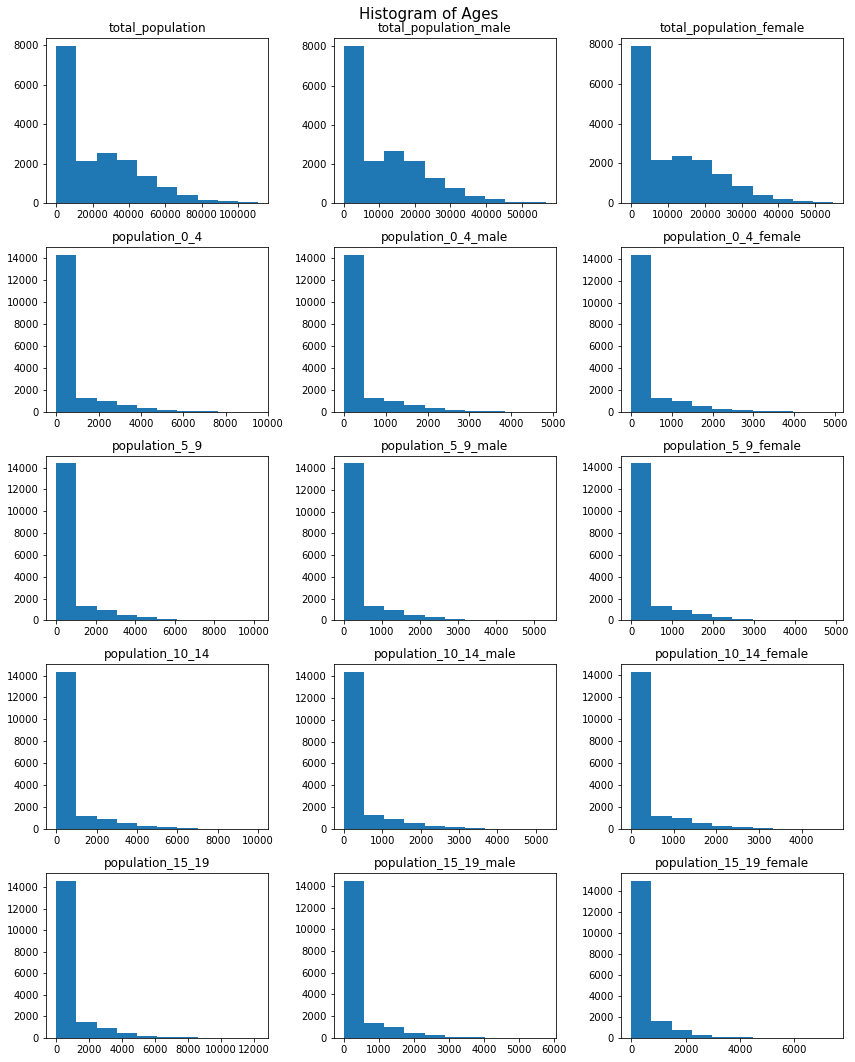

In [6]:
# scatter plots of all num vars w/ response var
num_rows = 5
num_cols = 3

df_plt = df_all[df_all.columns[2:]]

fig, ax = plt.subplots(num_rows, num_cols, figsize = (12, 15))

col_i = 0
for i in range(num_rows):
  for j in range(num_cols):
    var = df_plt.columns[col_i]
    ax[i][j].hist(df_plt[var])
    ax[i][j].set_title(var)
    col_i += 1

fig.suptitle("Histogram of Ages".format(col_i), size=15)
fig.tight_layout()
print("")